In [1]:
from HTfunctions import *
import matplotlib.pyplot as plt

In [2]:
file = findFiles("*Mag*1913*","Results/Daily")[0]
print(file)
name = "streamflow_ost_10dMA_1910_2009"

Results/Daily/trendMagnitudes_streamflow_ost_10dMA_1913_2012.npy


In [4]:
ost = openDict("Data/ostlandet_final.pkl")
catchments = ost["final100"]
meta = ost["metadata"]

In [5]:
altitudes = {}
for c in catchments:
    altitudes[c] = int(meta[meta.snumber==c].altitude)
altitudes.values()

dict_values([1326, 1139, 1099, 817, 782, 781])

In [6]:
arr = np.load(file)
arr.shape

(7, 365)

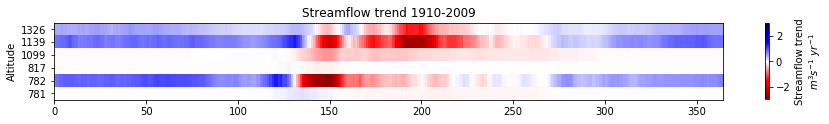

In [9]:
plt.figure(figsize=(15,2))
plt.imshow(arr,aspect=7,vmax=3,vmin=-3,cmap="seismic_r")
plt.colorbar(shrink=0.7,label="Streamflow trend\n$m^{3} s^{-1} \ yr^{-1}$")
plt.ylabel("Altitude")
yloc = np.arange(0,6,1)
plt.yticks(yloc,altitudes.values())
plt.ylim(5.5,-0.5)
plt.title("Streamflow trend 1910-2009")
plt.savefig(f"Plots/1910_2009/dailyTrend_{name}.png",dpi=400,bbox_inches='tight')

IndexError: list index out of range

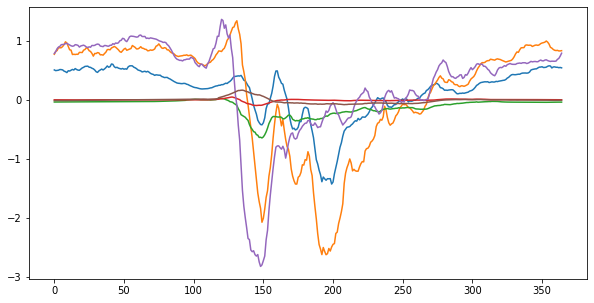

In [8]:
plt.figure(figsize=(10,5))
for c in range(arr.shape[0]):
    catch = catchments[c]
    plt.plot(arr[c,:],label=f"{altitudes[catch]} m.a.s.l. ({catch})")
plt.legend()